In [1]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils import to_categorical
import random,shutil
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model

In [2]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True,batch_size=1,target_size=(24,24),class_mode='categorical' ):

    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle,color_mode='grayscale',class_mode=class_mode,target_size=target_size)

In [3]:
BS= 32
TS=(24,24)
train_batch= generator('/kaggle/input/openned-closed-eyes/TrainingSet/TrainingSet',shuffle=True, batch_size=BS,target_size=TS)
valid_batch= generator('/kaggle/input/openned-closed-eyes/TestSet/TestSet',shuffle=True, batch_size=BS,target_size=TS)
SPE= len(train_batch.classes)//BS
VS = len(valid_batch.classes)//BS
print(SPE,VS)

Found 1704 images belonging to 2 classes.
Found 4232 images belonging to 2 classes.
53 132


In [4]:
img,labels= next(train_batch)
print(img.shape)

(32, 24, 24, 1)


In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(1,1)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 22, 22, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 64)        0

In [7]:
history = model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)

Epoch 1/15


/tmp/ipykernel_570/1781847468.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batch, validation_data=valid_batch,epochs=15,steps_per_epoch=SPE ,validation_steps=VS)
2024-02-06 13:50:05.145101: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1707227406.993282     646 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


53/53 [==============================] - 19s 280ms/step - loss: 0.5467 - accuracy: 0.7117 - val_loss: 0.3849 - val_accuracy: 0.8598
Epoch 2/15
53/53 [==============================] - 14s 268ms/step - loss: 0.3265 - accuracy: 0.8636 - val_loss: 0.2556 - val_accuracy: 0.9022
Epoch 3/15
53/53 [==============================] - 14s 266ms/step - loss: 0.2876 - accuracy: 0.8894 - val_loss: 0.2518 - val_accuracy: 0.9115
Epoch 4/15
53/53 [==============================] - 14s 262ms/step - loss: 0.2463 - accuracy: 0.9019 - val_loss: 0.2002 - val_accuracy: 0.9257
Epoch 5/15
53/53 [==============================] - 14s 263ms/step - loss: 0.2198 - accuracy: 0.9175 - val_loss: 0.1941 - val_accuracy: 0.9247
Epoch 6/15
53/53 [==============================] - 14s 270ms/step - loss: 0.1958 - accuracy: 0.9228 - val_loss: 0.2298 - val_accuracy: 0.9134
Epoch 7/15
53/53 [==============================] - 14s 273ms/step - loss: 0.1913 - accuracy: 0.9282 - val_loss: 0.1995 - val_accuracy: 0.9259
Epoch 8/15

In [8]:
model.evaluate(valid_batch)

133/133 [==============================] - 10s 74ms/step - loss: 0.2444 - accuracy: 0.9303


[0.24436673521995544, 0.9302930235862732]

In [9]:
model.save('models1.h5', overwrite=True)

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


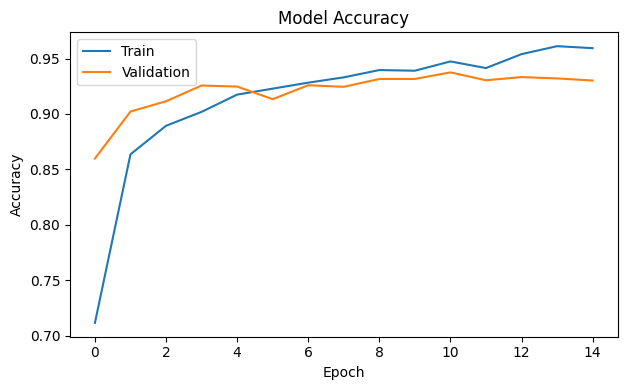

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

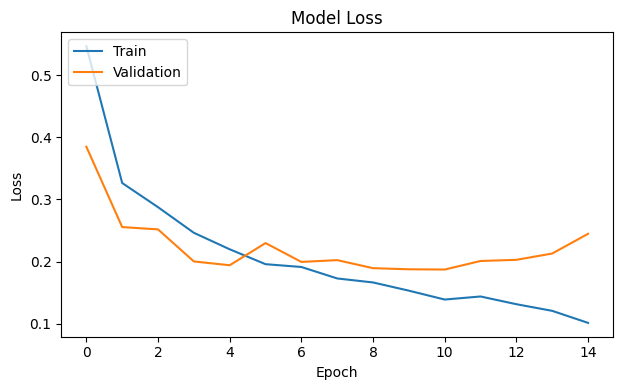

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()